# Title : Customer Segmentation Analysis

## Objective:
To segment customers based on purchasing behavior using clustering techniques
in order to support targeted marketing strategies.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 

# 1 Data Collection

In [2]:
df = pd.read_csv("ifood_df.csv")
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


# 2 Data Exploration and Cleaning

In [3]:
df.shape
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [4]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [5]:
df.duplicated().sum()
df =  df.drop_duplicates()

# 3 Descriptive Statistics

In [7]:
df['MntTotal'].mean()

np.float64(563.789213260762)

In [8]:
df['Recency'].mean()

np.float64(48.880752102919345)

In [9]:
df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].mean()

MntWines            306.492331
MntFruits            26.364671
MntMeatProducts     166.059871
MntFishProducts      37.603662
MntSweetProducts     27.268679
MntGoldProds         43.921821
dtype: float64

In [10]:
df['Income'].mean()
df['Income'].median()
df['Income'].std()

20713.046400850584

In [11]:
features = df[['Income','MntTotal']]

In [12]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 4 Customer Segmentation using K-Means

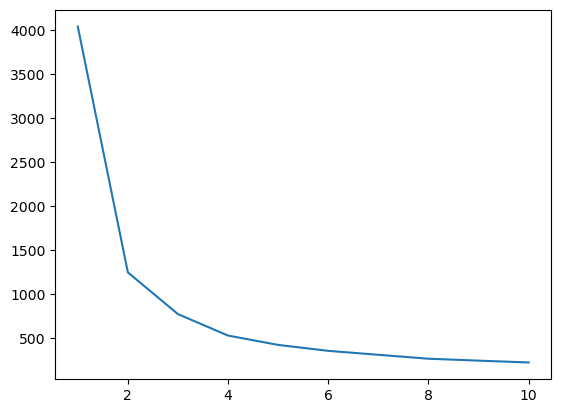

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.show()


# 5 Visualization

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


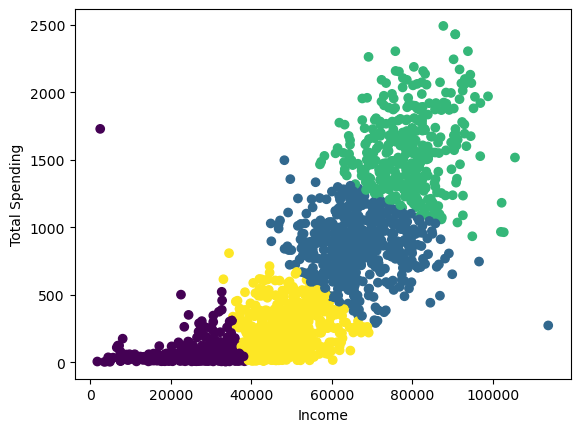

In [15]:
plt.scatter(df['Income'], df['MntTotal'], c=df['Cluster'])
plt.xlabel("Income")
plt.ylabel("Total Spending")
plt.show()


In [16]:
df['Cluster'].value_counts()


Cluster
3    596
0    578
1    510
2    337
Name: count, dtype: int64

In [17]:
df.groupby('Cluster').mean()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
Cluster,,,,,,,,,,,,,,,,,,,,,
0,26604.185121,0.832180,0.294118,48.202422,21.994810,5.152249,21.904844,7.538062,5.145329,15.856401,...,0.252595,0.017301,0.121107,0.083045,0.498270,0.141869,0.155709,61.735294,45.878893,0.084775
1,66447.192157,0.127451,0.637255,48.286275,488.368627,42.194118,222.407843,60.170588,44.015686,68.629412,...,0.262745,0.052941,0.086275,0.000000,0.511765,0.154902,0.247059,857.156863,788.527451,0.301961
2,79062.160237,0.050445,0.216617,50.216617,807.127596,68.261128,526.997033,96.050445,70.768546,75.836795,...,0.237389,0.038576,0.062315,0.000000,0.516320,0.169139,0.252226,1569.204748,1493.367953,0.982196
3,47903.884228,0.558725,0.775168,49.291946,143.687919,9.701342,53.557047,14.402685,9.796980,31.951342,...,0.250000,0.033557,0.080537,0.001678,0.489933,0.196309,0.231544,231.145973,199.194631,0.129195


In [18]:
df.groupby('Cluster')[['Income','MntTotal','Recency']].mean()


,Income,MntTotal,Recency
Cluster,,,
0,26604.185121,61.735294,48.202422
1,66447.192157,857.156863,48.286275
2,79062.160237,1569.204748,50.216617
3,47903.884228,231.145973,49.291946


# 6 Insights and Recommendations

# Insights

- Cluster 0:

Very low income customers (Avg Income ≈ 26,604)

Very low total spending (Avg Spending ≈ 61)

Moderate recency
These are low-value customers.

- Cluster 1:

High income customers (Avg Income ≈ 66,447)

High spending (Avg Spending ≈ 857)

Active buyers
hese are valuable customers.

- Cluster 2:

Very high income customers (Avg Income ≈ 79,062)

Very high spending (Avg Spending ≈ 1,569)

Active buyers
These are premium customers (most valuable segment).

- Cluster 3:

Medium income customers (Avg Income ≈ 47,903)

Moderate spending (Avg Spending ≈ 231)

Average activity
These are mid-level customers.

# Recommendations

Provide premium products and exclusive offers to Cluster 2 (Top customers).

Maintain loyalty programs and personalized marketing for Cluster 1.

Offer discounts and promotional campaigns to improve spending of Cluster 3.

Provide budget-friendly offers and re-engagement campaigns for Cluster 0.

Focus more marketing budget on Cluster 1 and 2 as they generate higher revenue.